In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Importing data set

In [3]:
df1=pd.read_excel('C:/Users/cmscomputers/Desktop/datasets/Attrition_Project/Attrition_Case_Study.xlsx')

In [4]:
df1.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
df1.isna().sum().sum()               #checking for missing values ,no missing values

0

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Created a feature from Age feature as Age_group

In [7]:
age_group=[]
for i in df1.Age:
    if(i>18 and i<=30):
        age_group.append('20-30')
    elif (i>30 and i<=40):
        age_group.append('30-40')
    elif (i>40 & i<=50):
        age_group.append('40-50')
    else:
        age_group.append('50-60')
    

In [8]:
df1['age_group']=age_group                 #created new feature from age feature

In [9]:
df1.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40-50
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40-50


# EDA

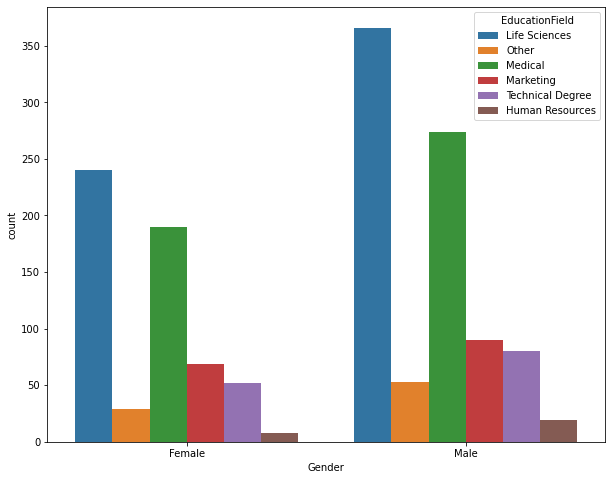

In [10]:
plt.figure(figsize=(10,8))
sb.countplot(x=df1.Gender,hue=df1.EducationField,data=df1)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='DailyRate'>

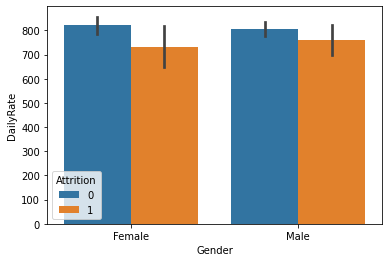

In [11]:
sb.barplot(df1.Gender,df1.DailyRate,hue=df1.Attrition)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

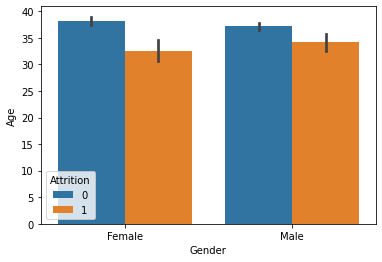

In [12]:
sb.barplot(y=df1.Age ,x=df1.Gender,hue=df1['Attrition'])

<AxesSubplot:xlabel='age_group', ylabel='MonthlyIncome'>

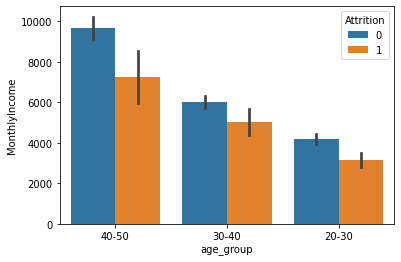

In [13]:
sb.barplot(df1.age_group,df1.MonthlyIncome,hue=df1.Attrition)

These two features have single value repeated ,so no use of such data in model

In [14]:
df1.EmployeeCount.value_counts(),df1.StandardHours.value_counts()

(1    1470
 Name: EmployeeCount, dtype: int64,
 80    1470
 Name: StandardHours, dtype: int64)

In [15]:
df1=df1.drop(['StandardHours','EmployeeCount','Age'],axis=1)

Correlation check

<AxesSubplot:>

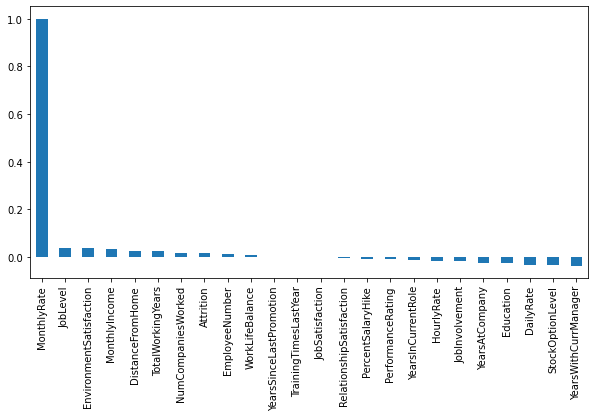

In [16]:
plt.figure(figsize=(10,5))
df1.corr()['MonthlyRate'].sort_values(ascending=False).plot(kind='bar')

The data doesnt seem much corelated 

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [18]:
df1['Attrition']=df1.Attrition.astype(str)        #thise is binary ,so converting it to categorical

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [20]:
df1.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,40-50
1,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,40-50
2,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,30-40
3,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,30-40
4,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,20-30


Checking features values to decide its data type

In [21]:
for i in df1.columns:
    print(i ,'=========>', len(df1[i].value_counts()), df1[i].dtype)

Attrition =========> 2 object
BusinessTravel =========> 3 object
DailyRate =========> 886 int64
Department =========> 3 object
DistanceFromHome =========> 29 int64
Education =========> 5 int64
EducationField =========> 6 object
EmployeeNumber =========> 1470 int64
EnvironmentSatisfaction =========> 4 int64
Gender =========> 2 object
HourlyRate =========> 71 int64
JobInvolvement =========> 4 int64
JobLevel =========> 5 int64
JobRole =========> 9 object
JobSatisfaction =========> 4 int64
MaritalStatus =========> 3 object
MonthlyIncome =========> 1349 int64
MonthlyRate =========> 1427 int64
NumCompaniesWorked =========> 10 int64
Over18 =========> 1 object
OverTime =========> 2 object
PercentSalaryHike =========> 15 int64
PerformanceRating =========> 2 int64
RelationshipSatisfaction =========> 4 int64
StockOptionLevel =========> 4 int64
TotalWorkingYears =========> 40 int64
TrainingTimesLastYear =========> 7 int64
WorkLifeBalance =========> 4 int64
YearsAtCompany =========> 37 int64
YearsI

In [22]:
obj_col=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
'RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

#these all features have same set of values repeated ,so we can consider them as categorical

In [23]:
df1[obj_col]=df1[obj_col].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   object
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Creating seperate lists for numeric and categorical features

In [24]:
cat=[]
con = []
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [25]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'age_group']

In [26]:
cat.remove('Attrition')

# Data Standerdization 

one hot encoding for categorical and standard scalar for numerical features

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_con=pd.DataFrame(ss.fit_transform(df1[con]),columns=con)

In [28]:
df_con

,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,0.742527,-1.010909,-1.701283,1.383138,-0.108350,0.726020,-0.421642,-0.164613
1,-1.297775,-0.147150,-1.699621,-0.240677,-0.291719,1.488876,-0.164511,0.488508
2,1.414363,-0.887515,-1.696298,1.284725,-0.937654,-1.674841,-0.550208,-1.144294
3,1.461466,-0.764121,-1.694636,-0.486709,-0.763634,1.243211,-0.421642,0.161947
4,-0.524295,-0.887515,-1.691313,-1.274014,-0.644858,0.325900,-0.678774,-0.817734
...,...,...,...,...,...,...,...,...
1465,0.202082,1.703764,1.721670,-1.224807,-0.835451,-0.284329,0.735447,-0.327893
1466,-0.469754,-0.393938,1.723332,-1.175601,0.741140,1.004010,-0.293077,-0.001333
1467,-1.605183,-0.640727,1.726655,1.038693,-0.076690,-1.284418,-0.678774,-0.164613
1468,0.546677,-0.887515,1.728317,-0.142264,-0.236474,-0.150393,0.735447,0.325228


In [29]:
df_cat=pd.get_dummies(df1[cat])
df_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,age_group_20-30,age_group_30-40,age_group_40-50
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1466,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1467,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1468,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [30]:
X=df_con.join(df_cat)
X['Attrition']=df1['Attrition']

In [31]:
X.columns

Index(['DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       ...
       'YearsWithCurrManager_4', 'YearsWithCurrManager_5',
       'YearsWithCurrManager_6', 'YearsWithCurrManager_7',
       'YearsWithCurrManager_8', 'YearsWithCurrManager_9', 'age_group_20-30',
       'age_group_30-40', 'age_group_40-50', 'Attrition'],
      dtype='object', length=162)

Declaring target and independant features

In [32]:
X=X.drop('MonthlyRate',axis=1)
Y=df1[['MonthlyRate']]

In [33]:
Y      #we will predict monthly rate using regression models

,MonthlyRate
0,19479
1,24907
2,2396
3,23159
4,16632
...,...
1465,12290
1466,21457
1467,5174
1468,13243


Spliting data into train and test sets

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

In [35]:
X.head()

,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,age_group_20-30,age_group_30-40,age_group_40-50,Attrition
0,0.742527,-1.010909,-1.701283,1.383138,-0.108350,-0.421642,-0.164613,0,0,1,...,0,1,0,0,0,0,0,0,1,1
1,-1.297775,-0.147150,-1.699621,-0.240677,-0.291719,-0.164511,0.488508,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.414363,-0.887515,-1.696298,1.284725,-0.937654,-0.550208,-1.144294,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1.461466,-0.764121,-1.694636,-0.486709,-0.763634,-0.421642,0.161947,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.524295,-0.887515,-1.691313,-1.274014,-0.644858,-0.678774,-0.817734,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Creating models ,training, testing and regularization

In [36]:
#All the models and metrics for regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_absolute_error

In [37]:
models1= {
          "LinearRegresion":LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "Ridge":Ridge(),
          "Lasso":Lasso()
} 
      
for i in range(len(list(models1))):
        model=list(models1.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_error=mean_absolute_error(ytrain,ytrain_pred)
       
        #testing set performances
        model_test_error=mean_absolute_error(ytest,ytest_pred)
       
        print(list(models1.keys())[i])
        
        print('Training Error :{:.4f}'.format(model_train_error))
    
        print('-'*40)
        
        print('Testing Error :{:.4f}'.format(model_test_error))
    
        print("="*40)
        print("\n")
        

LinearRegresion
Training Error :5691.3019
----------------------------------------
Testing Error :3397282753765.3062


DecisionTreeRegressor
Training Error :0.0000
----------------------------------------
Testing Error :8816.1905


RandomForestRegressor
Training Error :2308.6047
----------------------------------------
Testing Error :6423.2227


AdaBoostRegressor
Training Error :6034.4294
----------------------------------------
Testing Error :6292.0293


GradientBoostingRegressor
Training Error :4913.4350
----------------------------------------
Testing Error :6406.7931


Ridge
Training Error :5698.3964
----------------------------------------
Testing Error :6475.3830


Lasso
Training Error :5695.0195
----------------------------------------
Testing Error :6494.3209




Regularisation

In [38]:
#Hyper Parameters
#Decisiontree
params1 = {"max_depth": [2,4,8,12,16,20,25,30,40,50],
             "max_features": [2,4,8,'auto'],
             "min_samples_split" :[2,4,8],
             "min_samples_leaf": [2,4,8]}
#RandomForestRegressor
params2 = {"max_depth": [2,4,8,12,16,20,25,30,40,50],
             "max_features": [2,4,8,'auto'],
             "n_estimators": [50,100,200,500],
             "min_samples_split" :[2,4,8],
             "min_samples_leaf": [2,4,8]}
#AdaBoostRegressor
params3={ 'base_estimator' :[DecisionTreeRegressor(max_depth=2)],
             "n_estimators": [50,100,200,500],
             'learning_rate':[0.5,0.9,1.0],
             'loss':['linear','square','exponential']}


In [39]:
#models list for hyper parameter tuning
randomcv_models = [("DecisionTreeRegressor",DecisionTreeRegressor(),params1),
                   ('RandomForestRegressor',RandomForestRegressor(),params2),
                   ('AdaBoostRegressor',AdaBoostRegressor(),params3)
]

In [40]:
#finding bestparameters using randomised search cv algorithm 
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=4,verbose=2,n_jobs=-1)
    
    random.fit(xtrain,ytrain)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------------------Best Params for =={model_name}-----------------------")
    print(model_param[model_name])
    print("\n")

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
---------------------Best Params for ==DecisionTreeRegressor-----------------------
{'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 4, 'max_depth': 2}


---------------------Best Params for ==RandomForestRegressor-----------------------
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 2, 'max_depth': 20}


---------------------Best Params for ==AdaBoostRegressor-----------------------
{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.5, 'base_estimator': DecisionTreeRegressor(max_depth=2)}




In [41]:
#Regularised Models
models2= {"DecisionTreeRegressor-->min_samples_split=8":DecisionTreeRegressor(min_samples_split=8),
          
          "DecisionTreeRegressor-->min_samples_leaf=4":DecisionTreeRegressor(min_samples_leaf=4),
          
          "DecisionTreeRegressor-->max_depth=2":DecisionTreeRegressor(max_depth=2),
          
          "RandomForestRegressor-->min_samples_split=8":RandomForestRegressor(n_estimators=100,min_samples_split=8),
          
          "RandomForestRegressor-->min_samples_leaf=4":RandomForestRegressor(n_estimators=100,min_samples_leaf=4),
          
          "RandomForestRegressor-->max_depth=2":RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=2),
          
         "AdaBoostRegressor":AdaBoostRegressor(n_estimators=50,loss='square',
                                               learning_rate=0.9,base_estimator=DecisionTreeRegressor(max_depth=2))
          } 

for i in range(len(list(models2))):
        model=list(models2.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        model_train_error=mean_absolute_error(ytrain,ytrain_pred)
        model_test_error=mean_absolute_error(ytest,ytest_pred)
        print(list(models2.keys())[i])
        
        print('Training Error :{:.4f}'.format(model_train_error))
    
        print('-'*40)
        
        print('Testing Error :{:.4f}'.format(model_test_error))
    
        print("="*40)
        print("\n")
        

DecisionTreeRegressor-->min_samples_split=8
Training Error :1863.2558
----------------------------------------
Testing Error :8525.2366


DecisionTreeRegressor-->min_samples_leaf=4
Training Error :2894.7133
----------------------------------------
Testing Error :7967.9811


DecisionTreeRegressor-->max_depth=2
Training Error :6038.4224
----------------------------------------
Testing Error :6325.3704


RandomForestRegressor-->min_samples_split=8
Training Error :2939.8013
----------------------------------------
Testing Error :6362.0740


RandomForestRegressor-->min_samples_leaf=4
Training Error :3495.0658
----------------------------------------
Testing Error :6388.5122


RandomForestRegressor-->max_depth=2
Training Error :6030.8960
----------------------------------------
Testing Error :6265.8811


AdaBoostRegressor
Training Error :6132.4017
----------------------------------------
Testing Error :6215.9619




# Attrition prediction  

In [42]:
df1.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'age_group'],
      dtype='object')

In [43]:
df2=df1.drop('Attrition',axis=1)

In [44]:
cat=[]
con = []
for i in df2.columns:
    if(df2[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

Satanderdization

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_con=pd.DataFrame(ss.fit_transform(df2[con]),columns=con)

In [46]:
df_cat=pd.get_dummies(df2[cat])

In [47]:
Z=df_con.join(df_cat)
Z.head()

,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,age_group_20-30,age_group_30-40,age_group_40-50
0,0.742527,-1.010909,-1.701283,1.383138,-0.108350,0.726020,-0.421642,-0.164613,0,0,...,0,0,1,0,0,0,0,0,0,1
1,-1.297775,-0.147150,-1.699621,-0.240677,-0.291719,1.488876,-0.164511,0.488508,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1.414363,-0.887515,-1.696298,1.284725,-0.937654,-1.674841,-0.550208,-1.144294,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.461466,-0.764121,-1.694636,-0.486709,-0.763634,1.243211,-0.421642,0.161947,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-0.524295,-0.887515,-1.691313,-1.274014,-0.644858,0.325900,-0.678774,-0.817734,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
V=df1['Attrition']

In [49]:
V

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: object

spliting data for train and test

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Z,V,test_size=0.2,random_state=10)

In [59]:
xtrain.head()

,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,age_group_20-30,age_group_30-40,age_group_40-50
603,-1.364710,-0.887515,-0.317147,1.432345,-0.898558,-1.146829,-1.321601,-0.981014,0,0,...,0,0,0,0,0,0,0,0,0,1
1302,-1.530810,1.703764,1.331188,1.235519,-0.806979,-0.648892,-0.678774,-0.327893,0,0,...,1,0,0,0,0,0,0,0,1,0
1170,-0.524295,-0.887515,1.035418,1.038693,-0.833539,-1.126591,-0.678774,-0.491174,0,1,...,0,0,0,0,0,0,0,1,0,0
1042,0.442555,-0.517332,0.741310,1.186312,-0.709877,-0.891044,-0.550208,-0.327893,1,0,...,1,0,0,0,0,0,0,0,0,1
392,0.045899,-0.517332,-0.835575,0.989486,2.741627,-0.815714,1.635406,-0.491174,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model creation and regularization

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [53]:
models= {
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "RandomForestClassifier":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(),
          "AdaboostClassifier": AdaBoostClassifier(DecisionTreeClassifier()) 
} 
      
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
        
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
       
        print("="*40)
        print("\n")

DecisionTreeClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
----------------------------------
Model performances for testing set
Accuracy :0.7823
F1_score :0.7756


RandomForestClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
----------------------------------
Model performances for testing set
Accuracy :0.8367
F1_score :0.7892


LogisticRegression
Model performances for trainig set
Accuracy :0.9082
F1_score :0.9004
----------------------------------
Model performances for testing set
Accuracy :0.8844
F1_score :0.8776


AdaboostClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
----------------------------------
Model performances for testing set
Accuracy :0.7653
F1_score :0.7549




In [54]:
#Hyper Parameter training
params1 = {"max_depth": [2,4,8,12,16,20,25,30,40,50,60,70]}

params2 = {'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.3,0.5,0.7,0.9,1.0],
         'random_state':[21,31]} 

In [55]:
#models list for hyper parameter tuning
randomcv_models = [('DecisionTree',DecisionTreeClassifier(),params1),
                   ('Random_forest',RandomForestClassifier(),params1),
                   ('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier()),params2)
]


In [56]:
#Finding best parameters 
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=4,
                               verbose=2,
                               n_jobs=-1)
    
    random.fit(xtrain,ytrain)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------------------Best Params for =={model_name}-----------------------")
    print(model_param[model_name])

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
---------------------Best Params for ==DecisionTree-----------------------
{'max_depth': 2}
---------------------Best Params for ==Random_forest-----------------------
{'max_depth': 12}
---------------------Best Params for ==AdaBoostClassifier-----------------------
{'random_state': 31, 'n_estimators': 50, 'learning_rate': 0.3}


In [57]:
models= { 'DecisionTree':DecisionTreeClassifier(max_depth=2),
          "RandomForestClassifier":RandomForestClassifier(max_depth=20,random_state=31),
          'AdaBoostClassifier':AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),random_state=31,n_estimators=50,learning_rate=0.3)
} 
      
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
       
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
       
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
        
        print("="*40)
        print("\n")

DecisionTree
Model performances for trainig set
Accuracy :0.8580
F1_score :0.8233
----------------------------------
Model performances for testing set
Accuracy :0.8503
F1_score :0.8192


RandomForestClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
----------------------------------
Model performances for testing set
Accuracy :0.8401
F1_score :0.7917


AdaBoostClassifier
Model performances for trainig set
Accuracy :0.9218
F1_score :0.9119
----------------------------------
Model performances for testing set
Accuracy :0.8571
F1_score :0.8367


